<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Flatten
from tensorflow.keras.optimizers import Adam

 # Creating the Sine Series 

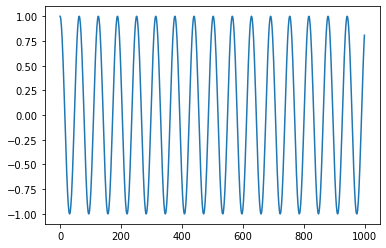

In [49]:
series = np.cos(0.1*np.arange(1000))
plt.plot(series)

# Creating Training and Target 

In [50]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
  
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

print("X shape is:", X.shape)
print("Y shape is:", Y.shape)

X shape is: (990, 10, 1)
Y shape is: (990,)


# Creating the Model

In [0]:
i = Input(shape=(T,1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer = Adam(lr = 0.001), loss='mse')

# Training the Model

In [52]:
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs = 80)

Epoch 1/80
16/16 [==============================] - 0s 13ms/step - loss: 0.4909 - val_loss: 0.3521
Epoch 2/80
16/16 [==============================] - 0s 5ms/step - loss: 0.2571 - val_loss: 0.1486
Epoch 3/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0855 - val_loss: 0.0375
Epoch 4/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0245 - val_loss: 0.0131
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.0064
Epoch 6/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 7/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 8/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 11/80
16/16 

# Plotting Loss

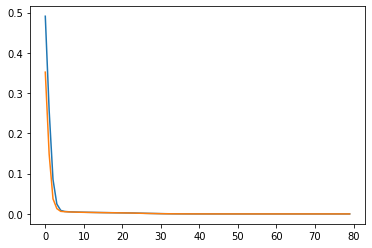

In [53]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

# Using wrong method of forecasting

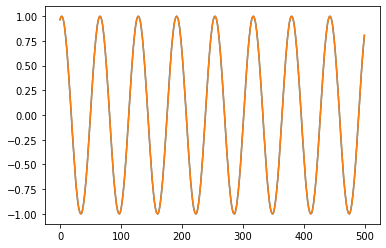

In [55]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2  # index of first validation input

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0]
  i+=1

  validation_predictions.append(p)

plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_target, label = 'target')

# Using the correct method to predict

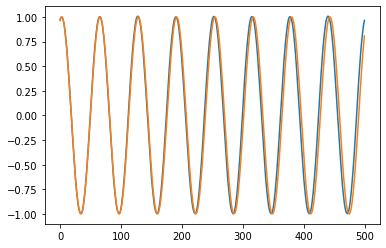

In [68]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] # index of first validation input

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]
  

  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p


plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_target, label = 'target')

In [57]:
X[-N//2]

array([[0.30059254],
       [0.39430722],
       [0.48408211],
       [0.56902021],
       [0.64827284],
       [0.72104815],
       [0.78661899],
       [0.84433019],
       [0.89360512],
       [0.93395144]])

In [66]:
X[1]

array([[0.99500417],
       [0.98006658],
       [0.95533649],
       [0.92106099],
       [0.87758256],
       [0.82533561],
       [0.76484219],
       [0.69670671],
       [0.62160997],
       [0.54030231]])